<a href="https://colab.research.google.com/github/humeraaa/Khursheed-Govt.Girls-Degree-College/blob/master/KGCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing packages in a Python interpreter means that they are available under site-packages, 
# or from wherever they were installed in development mode (e.g., with python setup.py develop, 
#or with pip install -e .).

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

# Install GraphViz with apt
!apt-get install graphviz -y

# Method 1 for visualization model
from IPython.display import SVG
from IPython.display import Image

#Method 2 for visualization model
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,154 kB of

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from keras.datasets import mnist, fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
nb_classes = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
Y_train: (60000, 10)


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train:', X_train.shape)

X_train: (60000, 28, 28, 1)


Initialization Now we are ready to create a convolutional model.

The Convolution2D layers operate on 2D matrices so we input the digit images directly to the model. The MaxPooling2D layer reduces the spatial dimensions, that is, makes the image smaller. The Flatten layer flattens the 2D matrices into vectors, so we can then switch to Dense layers as in the MLP model. See https://keras.io/layers/convolutional/, https://keras.io/layers/pooling/ for more information.

In [0]:
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

model = Sequential()

model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
__________

When we try to visualize model error for pydot occurs and some pages says that you need to Intall pydot and then restart your runtime.

In [0]:
# But as a matter of fact on do not need to install any package for visualization
#Whether executables of GraphViz are on the path is a separate issue.
#The Python package graphviz is unrelated to pydot, and not needed for using GraphViz via pydot
#https://stackoverflow.com/questions/47188756/keras-plot-model-tells-me-to-install-pydot/47209738#47209738

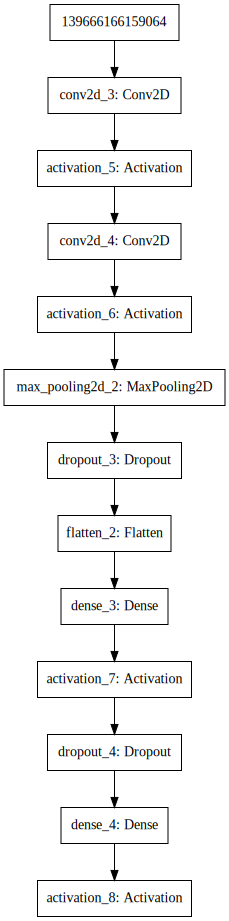

In [0]:


SVG(model_to_dot(model).create(prog='dot', format='svg'))

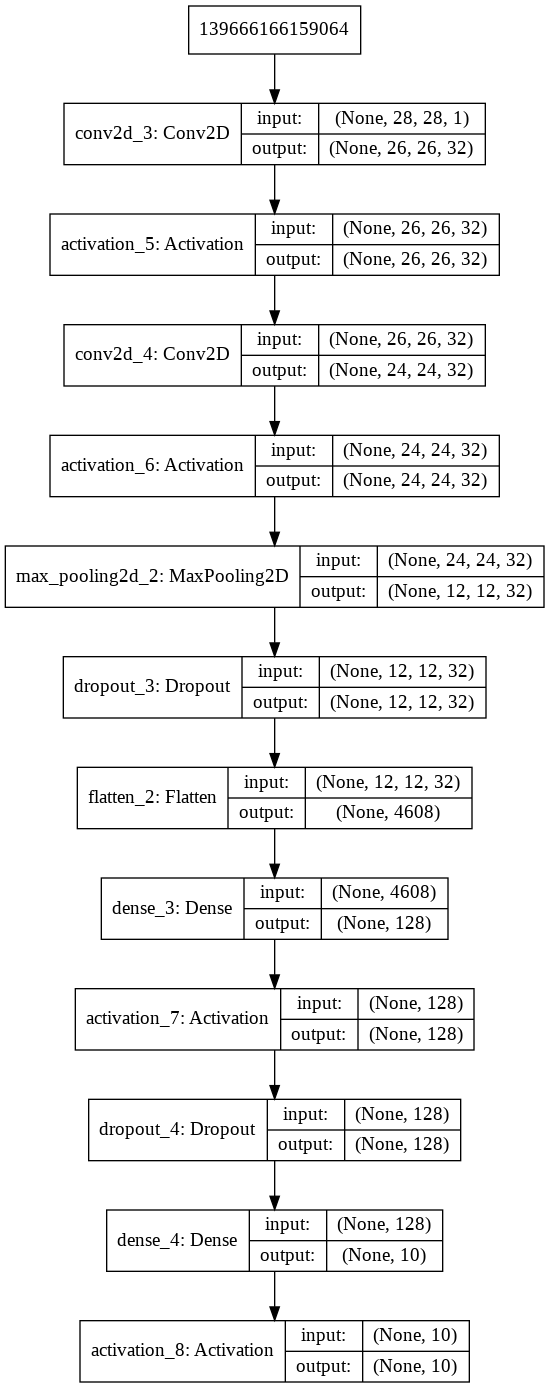

In [0]:
# Visualize network architecture using IPython
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Visualize using pydot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(filename='model_plot.png') 

In [0]:
#Learning Now let's train the CNN model. Note that we do not need the reshape() function as in the MLP case.
#This is a relatively complex model, so training is considerably slower than with MLPs.

%time

epochs = 5 # one epoch takes about 45 seconds

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11 µs
Epoch 1/5
 - 9s - loss: 0.2333 - acc: 0.9283
Epoch 2/5
 - 6s - loss: 0.0859 - acc: 0.9743
Epoch 3/5
 - 6s - loss: 0.0699 - acc: 0.9797
Epoch 4/5
 - 6s - loss: 0.0602 - acc: 0.9819
Epoch 5/5
 - 6s - loss: 0.0540 - acc: 0.9841


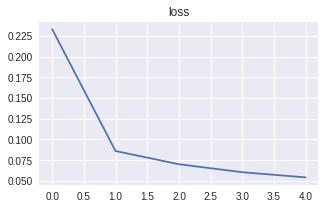

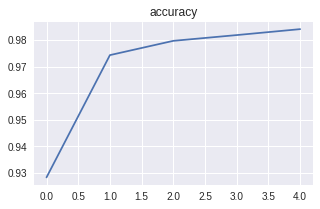

In [0]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

In [0]:
#Inference With enough training epochs, the test accuracy should exceed 99%.
#You can compare your result with the state-of-the art here. Even more results can be found here.
%%time
scores = model.evaluate(X_test, Y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 98.65%
CPU times: user 1.14 s, sys: 183 ms, total: 1.33 s
Wall time: 1.02 s


In [0]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10):
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(X_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            if K.image_dim_ordering() == 'th':
                plt.imshow(X_test[i,0,:,:], cmap="gray")
            else:
                plt.imshow(X_test[i,:,:,0], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


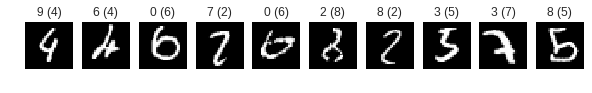

In [0]:
#Here are the first 10 test digits the CNN classified to a wrong class:
predictions = model.predict(X_test)

show_failures(predictions)

Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


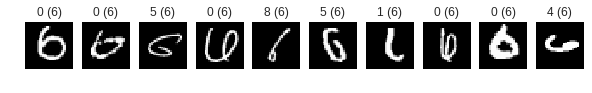

In [0]:
show_failures(predictions, trueclass=6)